In [8]:
import pandas as pd

# Загрузка данных
data = pd.read_csv('weather_description.csv')

# Отображение первых нескольких записей
data.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,haze,NaN,NaN,NaN
1,2012-10-01 13:00:00,mist,scattered clouds,light rain,sky is clear,mist,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,overcast clouds,sky is clear,sky is clear,sky is clear,haze,sky is clear,sky is clear,sky is clear
2,2012-10-01 14:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,sky is clear,sky is clear,broken clouds,overcast clouds,sky is clear,overcast clouds
3,2012-10-01 15:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds
4,2012-10-01 16:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds


In [9]:
df = data.copy()
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

for column in df:
    if df[column].dtype == 'object':
        df[column] = pd.factorize(df[column])[0]

df

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,1,0,0,0,0,...,0,0,1,1,0,0,1,1,0,1
2,2,1,0,1,0,1,0,0,0,0,...,0,0,1,1,1,0,1,1,1,1
3,3,1,0,1,0,1,0,0,0,0,...,0,0,1,1,1,0,1,1,1,1
4,4,1,0,1,0,1,0,0,0,0,...,0,0,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44455,44455,4,2,1,0,1,1,0,0,3,...,2,1,2,0,0,0,2,0,0,0
44456,44456,2,2,1,0,1,1,0,0,1,...,1,1,2,0,0,0,2,0,0,0
44457,44457,4,1,1,0,1,1,0,0,1,...,1,1,2,0,0,0,2,0,0,0
44458,44458,2,1,1,6,3,1,0,0,1,...,1,1,2,0,0,0,3,0,0,0


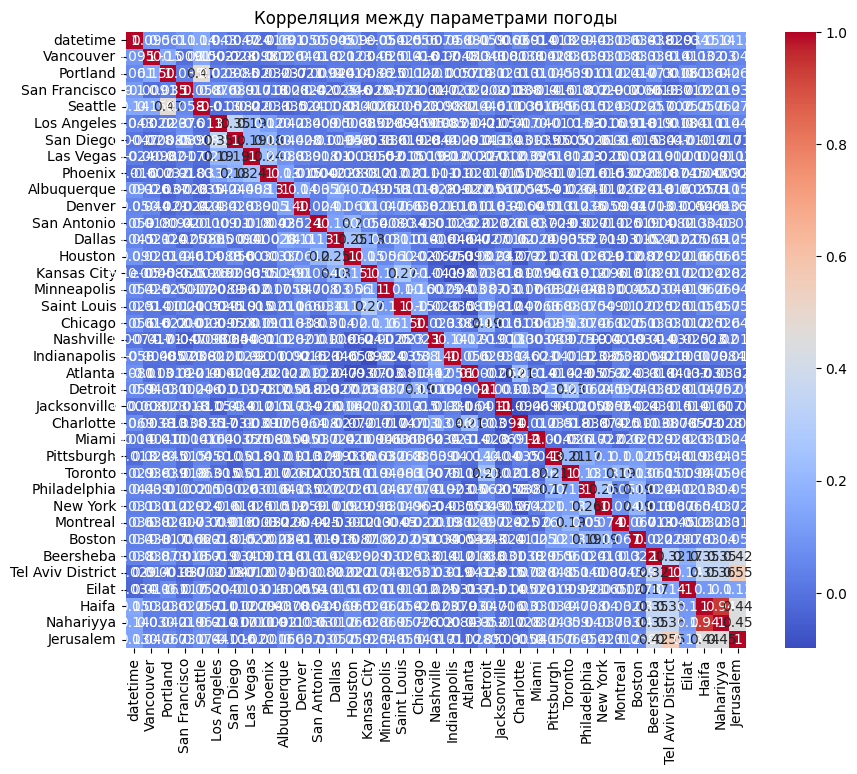

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисление матрицы корреляции
correlation_matrix = df.corr()

# Создание тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляция между параметрами погоды')
plt.show()